# Overview

In this collaborative notebook, our group will be combining our three submetrics into a final metric to determine the "bestness" of all of the neighborhoods in Pittsburgh

# Jack's Metric

The metric I have chosen to determine how favorable a neighborhood is will be population density. I deduce that the neighborhood neighborhood with the most people per acre is the best. I will be taking Neighborhood Census data from the Western Pennsylvania Regional Data Center to find populations/acres per neighborhood. Link: https://data.wprdc.org/dataset/pgh/resource/9c46a88c-8fca-4839-9848-c2b819ecbf0f..

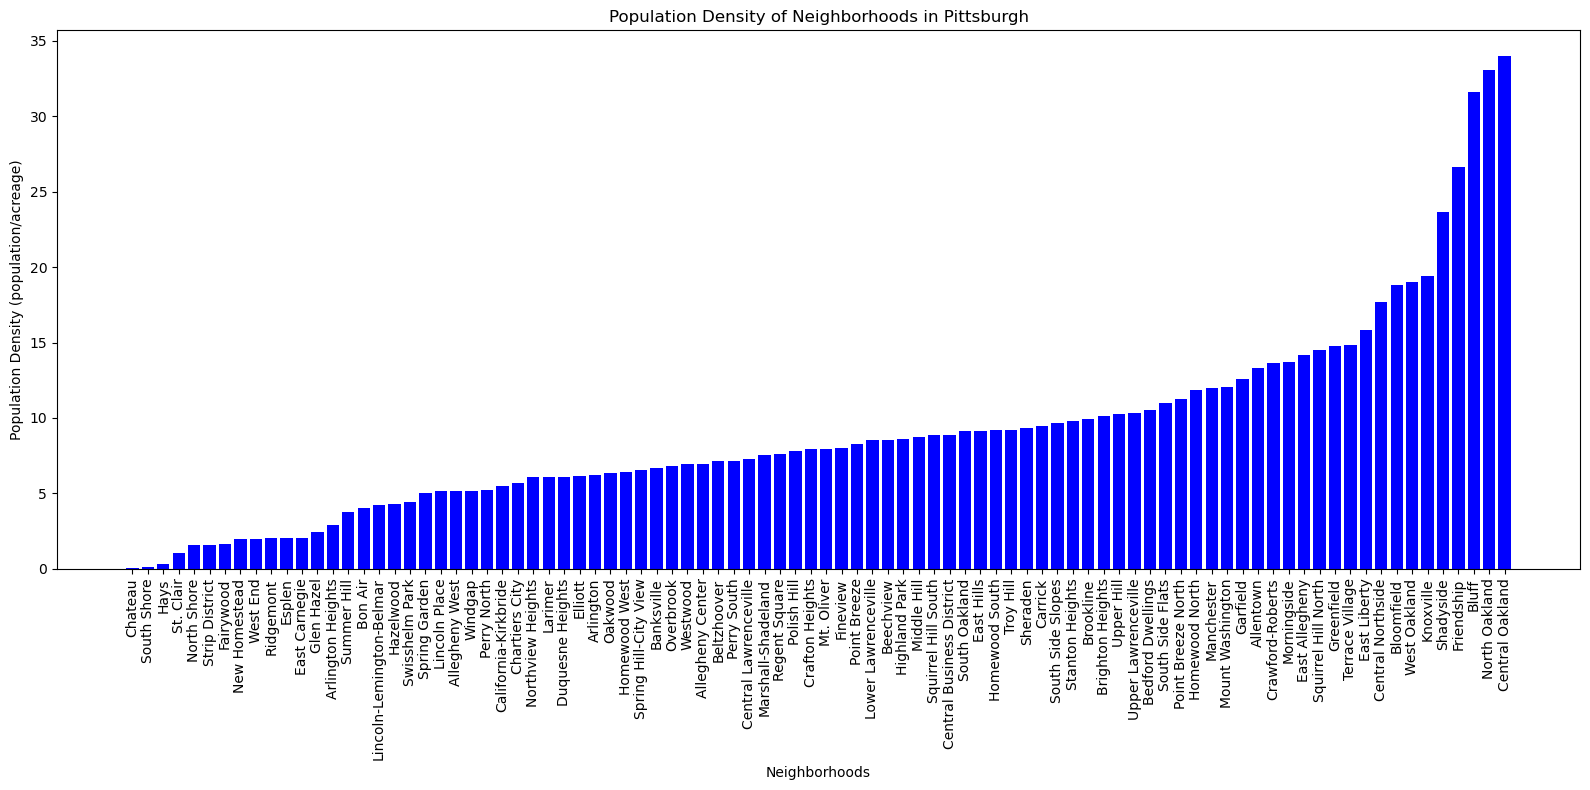

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np

neighborhoods = []
populations = []
rawAcreage = []
  
with open('pop-density-data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        neighborhoods.append(row[1]) 
        populations.append(int(row[3])) 
        rawAcreage.append(float(row[4])) 
        
acreage = [int(x) for x in rawAcreage]

popDense = []
for i in range(len(populations)):
    popDense.append(populations[i] / acreage[i])

sorted_index = np.argsort(popDense)
sorted_neighborhoods = [neighborhoods[i] for i in sorted_index]
sorted_popDense = np.sort(popDense)

plt.figure(figsize=(16, 8)) 
plt.bar(sorted_neighborhoods, sorted_popDense, color='blue')
plt.xlabel('Neighborhoods')
plt.ylabel('Population Density (population/acreage)')
plt.title('Population Density of Neighborhoods in Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# River's Metric

The metric that I have chosen to show the "best" neighborhood is the number of social services in that given neighborhood. My thought process was pretty simple. The more social services in one area, the "better" neighborhood that it is. I am taking data on the Western Pennsylvania Regional Data Center website from a dataset named "BigBurgh Social Service Listings," which is from BigBurgh.com.


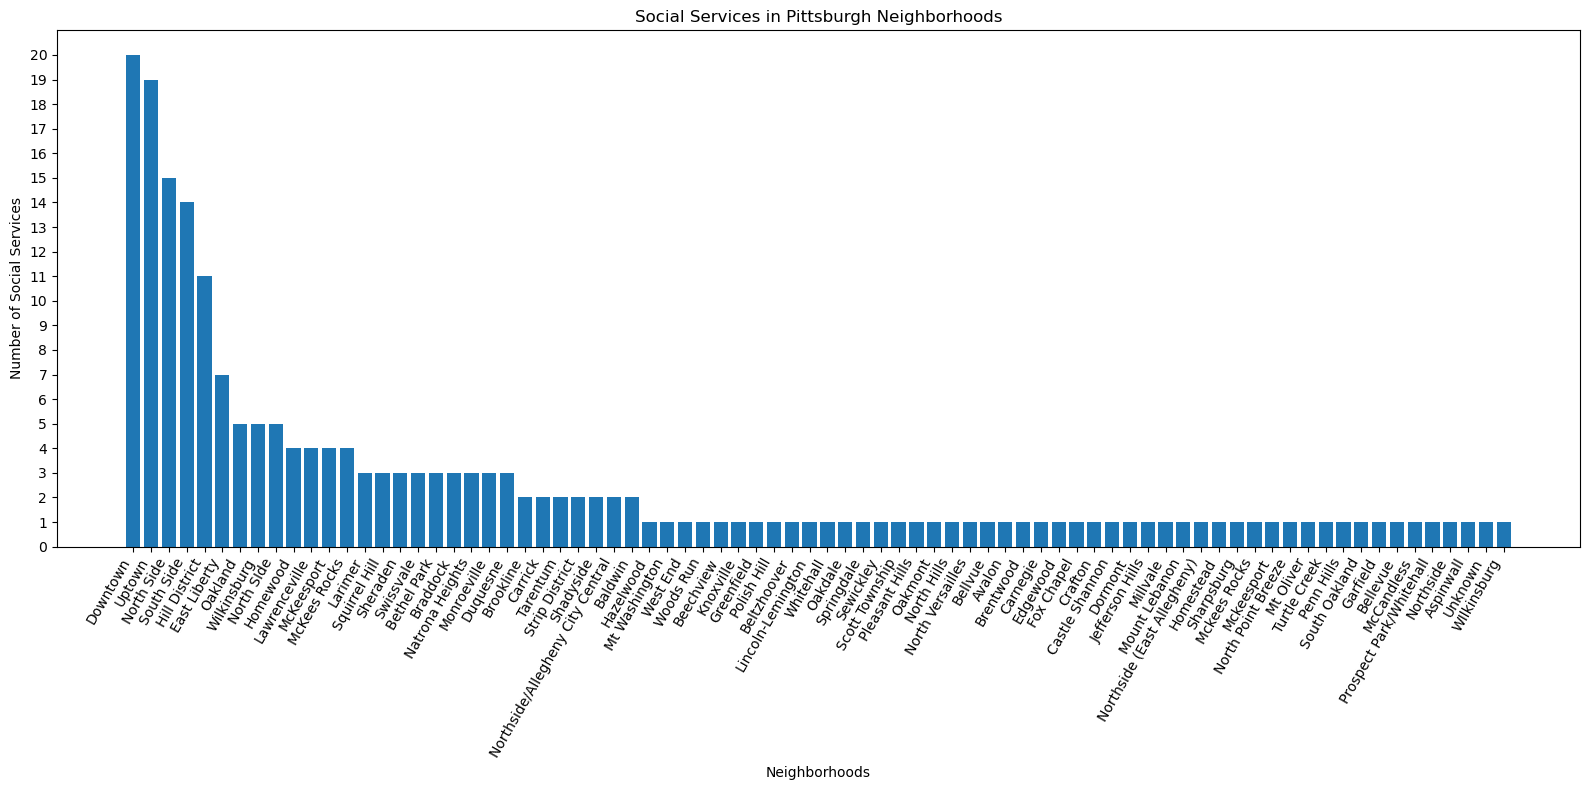

In [7]:
import csv
import matplotlib.pyplot as plt

neighborhoods = []

with open('social-service-data.csv', 'r', encoding="utf8") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        neighborhoods.append(row[3])

neighborhood_counts = {}
for neighborhood in neighborhoods:
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

sorted_neighborhoods = sorted(neighborhood_counts, key=lambda x: neighborhood_counts[x], reverse=True)

counts = [neighborhood_counts[neighborhood] for neighborhood in sorted_neighborhoods]

plt.figure(figsize=(16, 8))
plt.bar(sorted_neighborhoods, counts)
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Social Services')
plt.title('Social Services in Pittsburgh Neighborhoods')
plt.xticks(rotation=60, ha='right')
plt.yticks(range(max(counts) + 1))
plt.tight_layout()
plt.show()

# Nathan's Metric

I have chosen to do police arrest data as my metric. I think that the neighborhoods with the least amount of arrests are the safest since there is likely less crime in those neighborhoods. This would lead to us finding the best neighborhood. Link: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

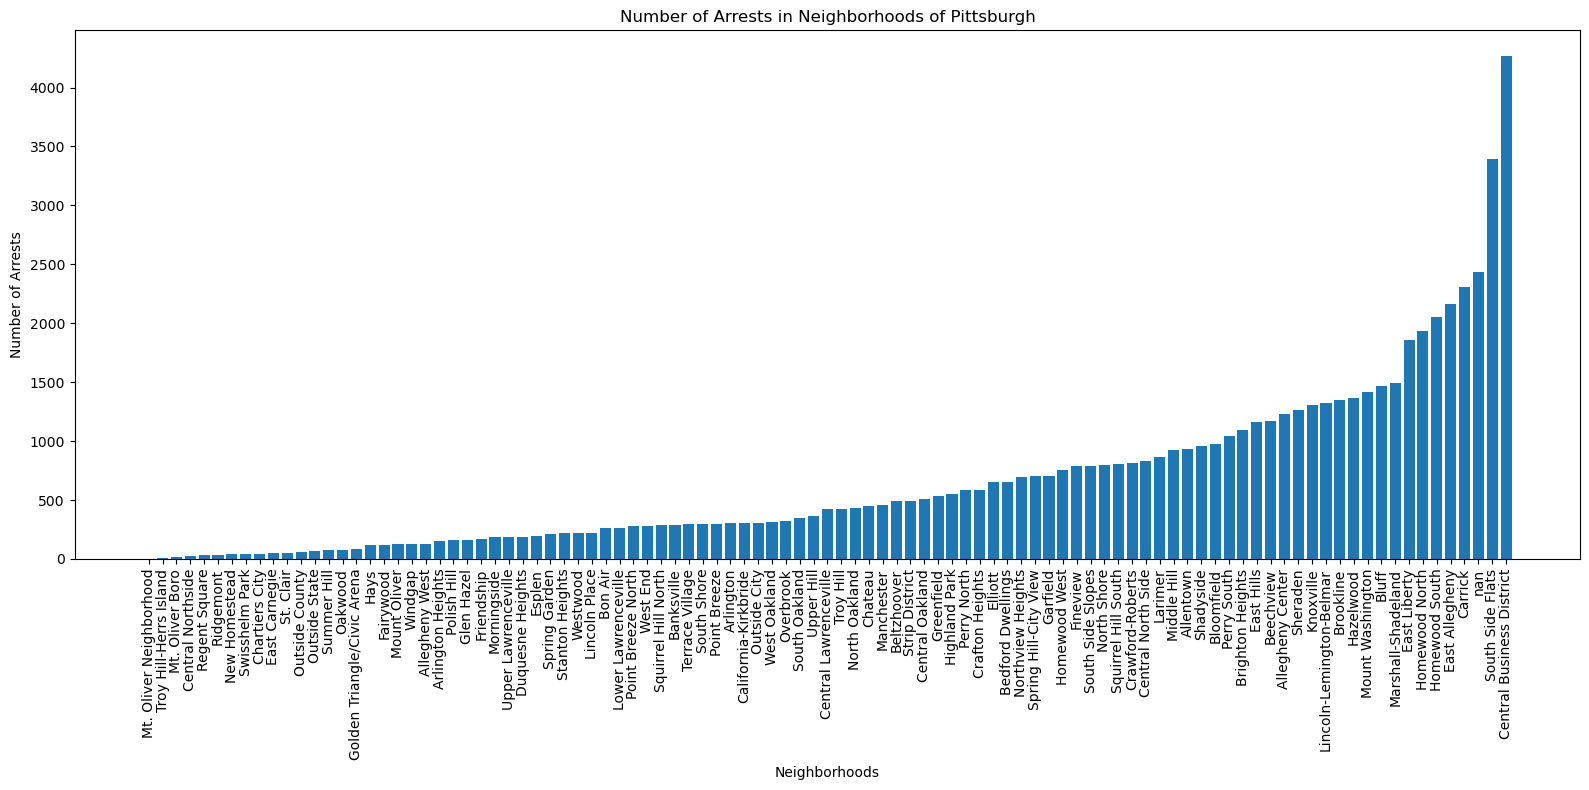

In [8]:
#importing pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

#reading csv
pad = pd.read_csv('police_arrest_data.csv')

#create empty dictionary
adict = dict()

#fill adict with data from csv
for index, row in pad.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood in adict:
        adict[neighborhood] = adict[neighborhood] + 1
    else:
        adict[neighborhood] = 1

#create list for adict keys and values
#keys = neighborhoods / values = arrests
key_adict = list(adict.keys())
val_adict = list(adict.values())

sort_adict = dict(sorted(adict.items(), key=lambda item: item[1]))
skey_adict = list(sort_adict.keys())
sval_adict = list(sort_adict.values())

plt.figure(figsize=(16, 8)) 
plt.bar(range(len(sort_adict)),sval_adict,tick_label=skey_adict)
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests in Neighborhoods of Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

# The Metric for "Bestness"

In our separate research, our group came to three separate conclusions.

1. A good neighborhood has a high population density
2. A good neighborhood has a high number of offered social services
3. A good neighborhood has a low number of arrests in its history

Thus, our combined metric is an equation that takes all of these into account. It is represented by:

(Population Density * Number of Social Services) / Number of Arrests

This equation works for our purposes because it will get bigger when the population density or number of social services offered is bigger, and will get smaller when there is a higher number of arrests in the history of the area.

Below is a graph visualizing this. The code written to create the graph combines code from all of our personal notebooks.

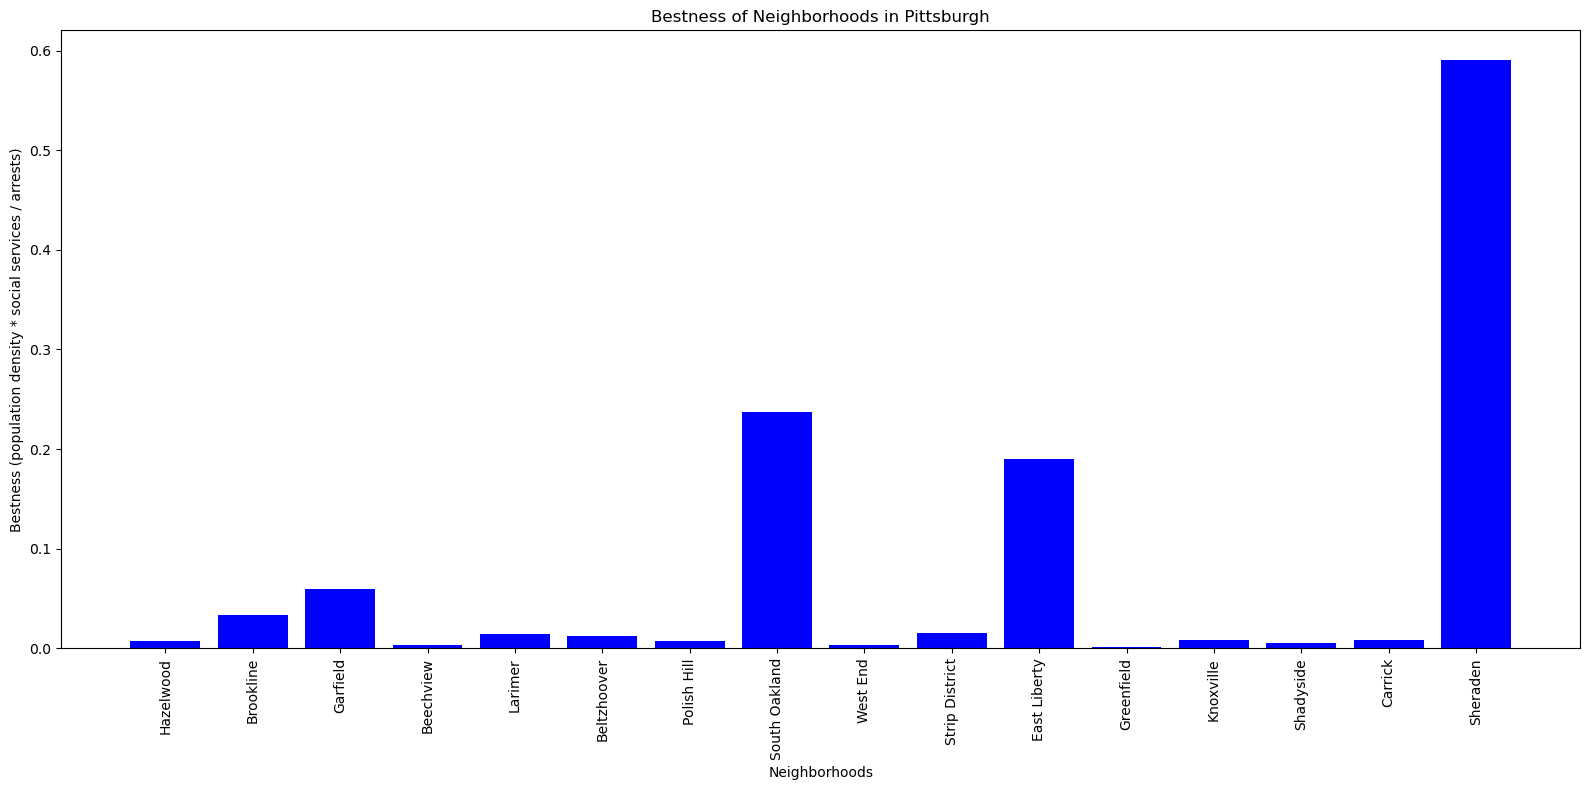

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Creating population density variable (Jack's code)

neighborhoods_pop = []
populations = []
rawAcreage = []

with open('pop-density-data.csv', 'r') as csvfile_pop:
    csvreader_pop = csv.reader(csvfile_pop)
    next(csvreader_pop)
    for row in csvreader_pop:
        neighborhoods_pop.append(row[1]) 
        populations.append(int(row[3])) 
        rawAcreage.append(float(row[4])) 
        
acreage = [int(x) for x in rawAcreage]

popDense = []
for i in range(len(populations)):
    popDense.append(populations[i] / acreage[i])

# Creating social services variable (River's code)

neighborhoods_soc = []

with open('social-service-data.csv', 'r', encoding="utf8") as csvfile_soc:
    csvreader_soc = csv.reader(csvfile_soc)
    next(csvreader_soc)
    for row in csvreader_soc:
        neighborhoods_soc.append(row[3])

neighborhood_counts = {}
for neighborhood in neighborhoods_soc:
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

# Creating arrest data variable (Nathan's code)

pad = pd.read_csv('police_arrest_data.csv')
adict = dict()

for index, row in pad.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood in adict:
        adict[neighborhood] = adict[neighborhood] + 1
    else:
        adict[neighborhood] = 1
        
neighborhoods_arr = list(adict.keys())
arrests = list(adict.values())

# Combining metrics to create "bestness" variable (Jack's code)

def shared_variables(list1, list2):  
    set1 = set(list1)
    set2 = set(list2)
    shared = list(set1.intersection(set2))
    return shared

shared_neighborhoods_first = shared_variables(neighborhoods_pop, neighborhoods_soc)
shared_neighborhoods = shared_variables(shared_neighborhoods_first, neighborhoods_arr)

def find_shared_indexes(list1, list2):
    shared_indexes = [idx for idx, val in enumerate(list1) if val in list2]
    return shared_indexes

def extract_values(list1, list2, list_to_extract):
    shared_indexes = find_shared_indexes(list1, list2)
    shared_values = [list_to_extract[idx] for idx in shared_indexes]
    return shared_values

updated_popDense = extract_values(shared_neighborhoods, neighborhoods_pop, popDense)
updated_arrests = extract_values(shared_neighborhoods, neighborhoods_arr, arrests)
socialCount = [neighborhood_counts[neighborhood] for neighborhood in shared_neighborhoods]

def calculate_bestness(list1, list2, list3):
    multiplied_values = [x * y for x, y in zip(list1, list2)]
    divided_values = [x / y for x, y in zip(multiplied_values, list3)]
    return divided_values

bestness = calculate_bestness(updated_popDense, socialCount, updated_arrests)

# Plotting graph (Jack's code)

plt.figure(figsize=(16, 8)) 
plt.bar(shared_neighborhoods, bestness, color='blue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bestness (population density * social services / arrests)')
plt.title('Bestness of Neighborhoods in Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

As you might have noticed, the data here has much less neighborhoods than in any of our individual datasets. These we, unfortunately, the only 16 neighborhoods that were represented in all of our data sets.

# The Best Neighborhood

Even though it's pretty obvious already which of these neighborhoods has the highest bestness, we are going to sort the graph above to make it easier to see and more visually appealing. 

Below is an updated version of the code above to create a sorted graph. The added code is marked.

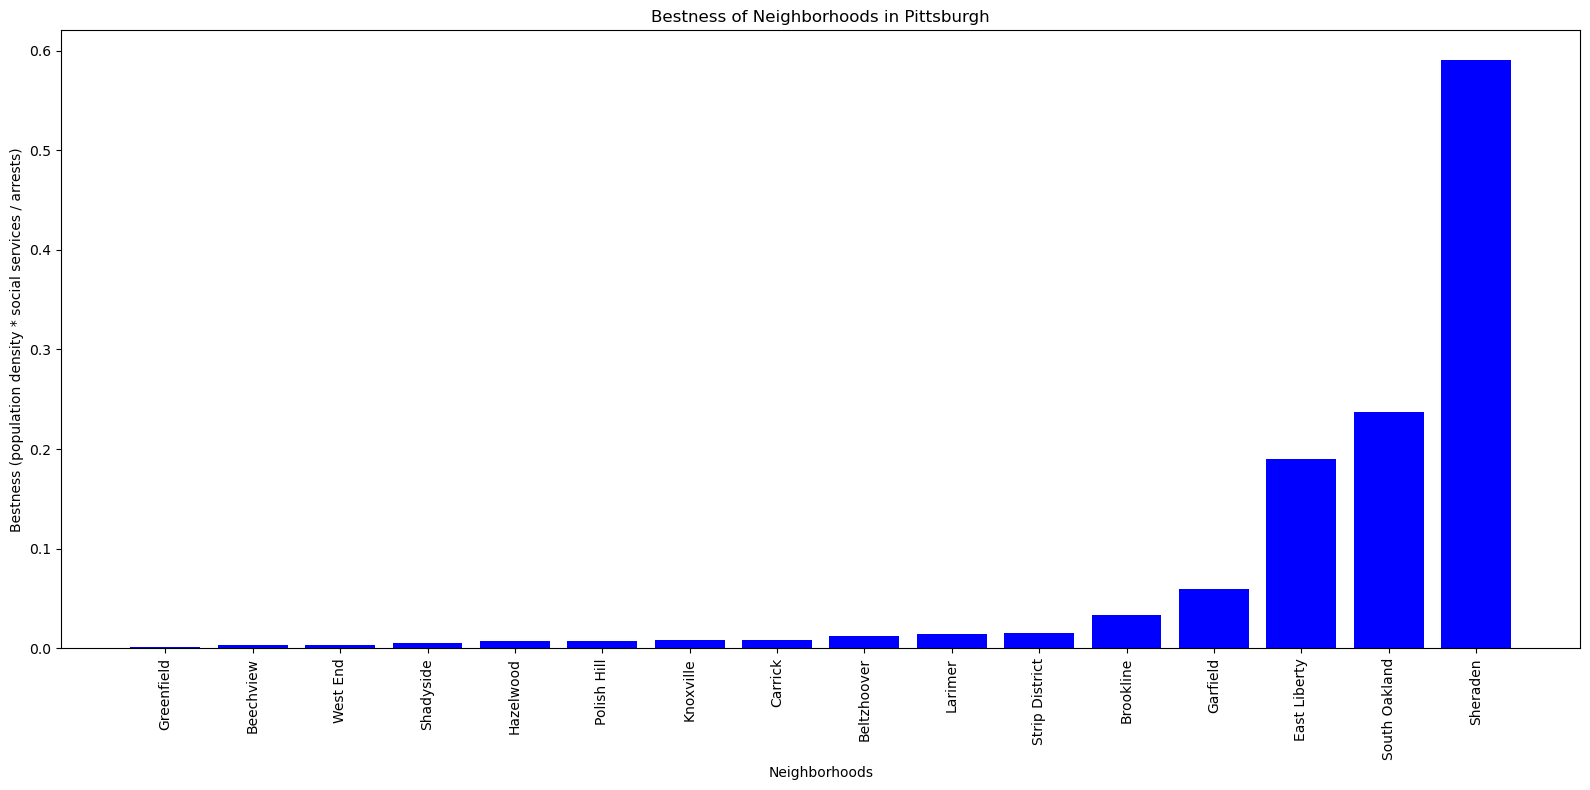

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating population density variable (Jack's code)

neighborhoods_pop = []
populations = []
rawAcreage = []

with open('pop-density-data.csv', 'r') as csvfile_pop:
    csvreader_pop = csv.reader(csvfile_pop)
    next(csvreader_pop)
    for row in csvreader_pop:
        neighborhoods_pop.append(row[1]) 
        populations.append(int(row[3])) 
        rawAcreage.append(float(row[4])) 
        
acreage = [int(x) for x in rawAcreage]

popDense = []
for i in range(len(populations)):
    popDense.append(populations[i] / acreage[i])

# Creating social services variable (River's code)

neighborhoods_soc = []

with open('social-service-data.csv', 'r', encoding="utf8") as csvfile_soc:
    csvreader_soc = csv.reader(csvfile_soc)
    next(csvreader_soc)
    for row in csvreader_soc:
        neighborhoods_soc.append(row[3])

neighborhood_counts = {}
for neighborhood in neighborhoods_soc:
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

# Creating arrest data variable (Nathan's code)

pad = pd.read_csv('police_arrest_data.csv')
adict = dict()

for index, row in pad.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood in adict:
        adict[neighborhood] = adict[neighborhood] + 1
    else:
        adict[neighborhood] = 1
        
neighborhoods_arr = list(adict.keys())
arrests = list(adict.values())

# Combining metrics to create "bestness" variable (Jack's code)

def shared_variables(list1, list2):  
    set1 = set(list1)
    set2 = set(list2)
    shared = list(set1.intersection(set2))
    return shared

shared_neighborhoods_first = shared_variables(neighborhoods_pop, neighborhoods_soc)
shared_neighborhoods = shared_variables(shared_neighborhoods_first, neighborhoods_arr)

def find_shared_indexes(list1, list2):
    shared_indexes = [idx for idx, val in enumerate(list1) if val in list2]
    return shared_indexes
    
def extract_values(list1, list2, list_to_extract):
    shared_indexes = find_shared_indexes(list1, list2)
    shared_values = [list_to_extract[idx] for idx in shared_indexes]
    return shared_values

updated_popDense = extract_values(shared_neighborhoods, neighborhoods_pop, popDense)
updated_arrests = extract_values(shared_neighborhoods, neighborhoods_arr, arrests)
socialCount = [neighborhood_counts[neighborhood] for neighborhood in shared_neighborhoods]

def calculate_bestness(list1, list2, list3):
    multiplied_values = [x * y for x, y in zip(list1, list2)]
    divided_values = [x / y for x, y in zip(multiplied_values, list3)]
    return divided_values

bestness = calculate_bestness(updated_popDense, socialCount, updated_arrests)

# Sorting data (Jack's code)

sorted_index = np.argsort(bestness)
sorted_neighborhoods = [shared_neighborhoods[i] for i in sorted_index]
sorted_bestness = np.sort(bestness)

# Plotting graph (Jack's code)

plt.figure(figsize=(16, 8)) 
plt.bar(sorted_neighborhoods, sorted_bestness, color='blue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bestness (population density * social services / arrests)')
plt.title('Bestness of Neighborhoods in Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Based on the above graph, we can can clearly see that our shared metric defines **Sheraden** as the best neighborhood in Pittsburgh.

# Conclusion

Jack: Once again, nobody in this group can specify enough that "bestness" is more of a subjective feeling an can never be truly defined with a metric. We cannot in good conscience actually crown Sheraden as the best neighborhood in Pittsburgh, even more so now that a good number of the neighborhoods have been taken out of the running simply for not being common among our individual data sets. However, data can help us to understand a lot about the world, and we whole-heartedly respect the assignment we were given and its role in teaching us how to better handle data using code.

River: As Jack said, determining the "best" neighborhood with such a simple metric as we used is not an easy task to accomplish. Despite this, I believe that the datasets we chose allowed us to make a very good educated guess as to which neighborhood is actually the "best." It just makes sense. If a place is very dense in population, has a large amount of social servies for those in need, and has a low amount of crime, it is obviously going to be a nice neighborhood. For that reason, I think that Sheraden is fairly deserving of the title of "best" neighborhood in this instance.

Nathan: The datasets can be great at giving us an idea of what the "best" neighborhood could be. Sheraden makes sense given our metric and how the low crime, high amount of social service, and high population density. Although, there can be alot of bias on what the "best" neighborhood is. For instance, someone might think that East Liberty is the best because they grew up there. Overall, despite potential bias, I think that the metrics that we used do a good enough job at displaying what could be considered the "best" neighborhood.